**1. Dataset Information**

In [40]:
import pandas as pd
import io
file = '/content/callingParty_22.csv'
df = pd.read_csv(file)
print("\nFirst two rows of the dataframe:")
print(df.head(2))
print("\nDataframe information:")
print(df.info())
print("\nSDataframe describe:")
print(df.describe())


First two rows of the dataframe:
   A-Party Number  Total Calls  Unique B-Parties  Average Call Duration  \
0    990099926666          671               491                   8145   
1    990013750484          770               497                   8752   

   Call Success Rate  Spam  
0               0.61     0  
1               0.80     0  

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   A-Party Number         5500 non-null   int64  
 1   Total Calls            5500 non-null   int64  
 2   Unique B-Parties       5500 non-null   int64  
 3   Average Call Duration  5500 non-null   int64  
 4   Call Success Rate      5500 non-null   float64
 5   Spam                   5500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 257.9 KB
None

SDataframe describe:
       A-Party Number  Total

**2. Feature visualization**

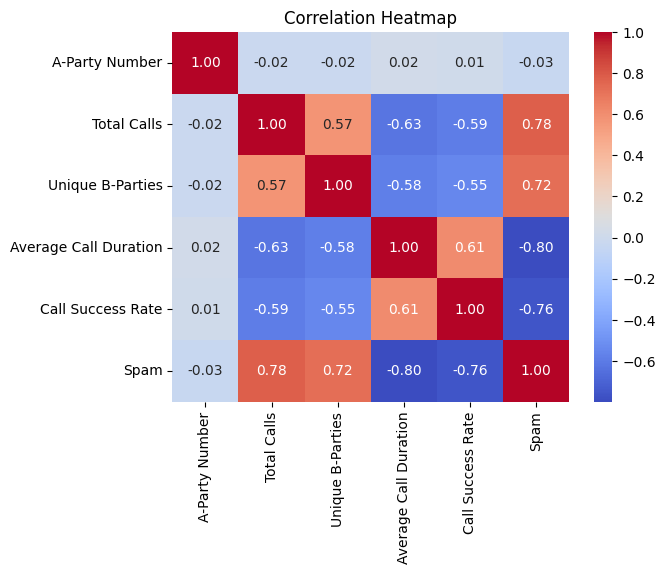

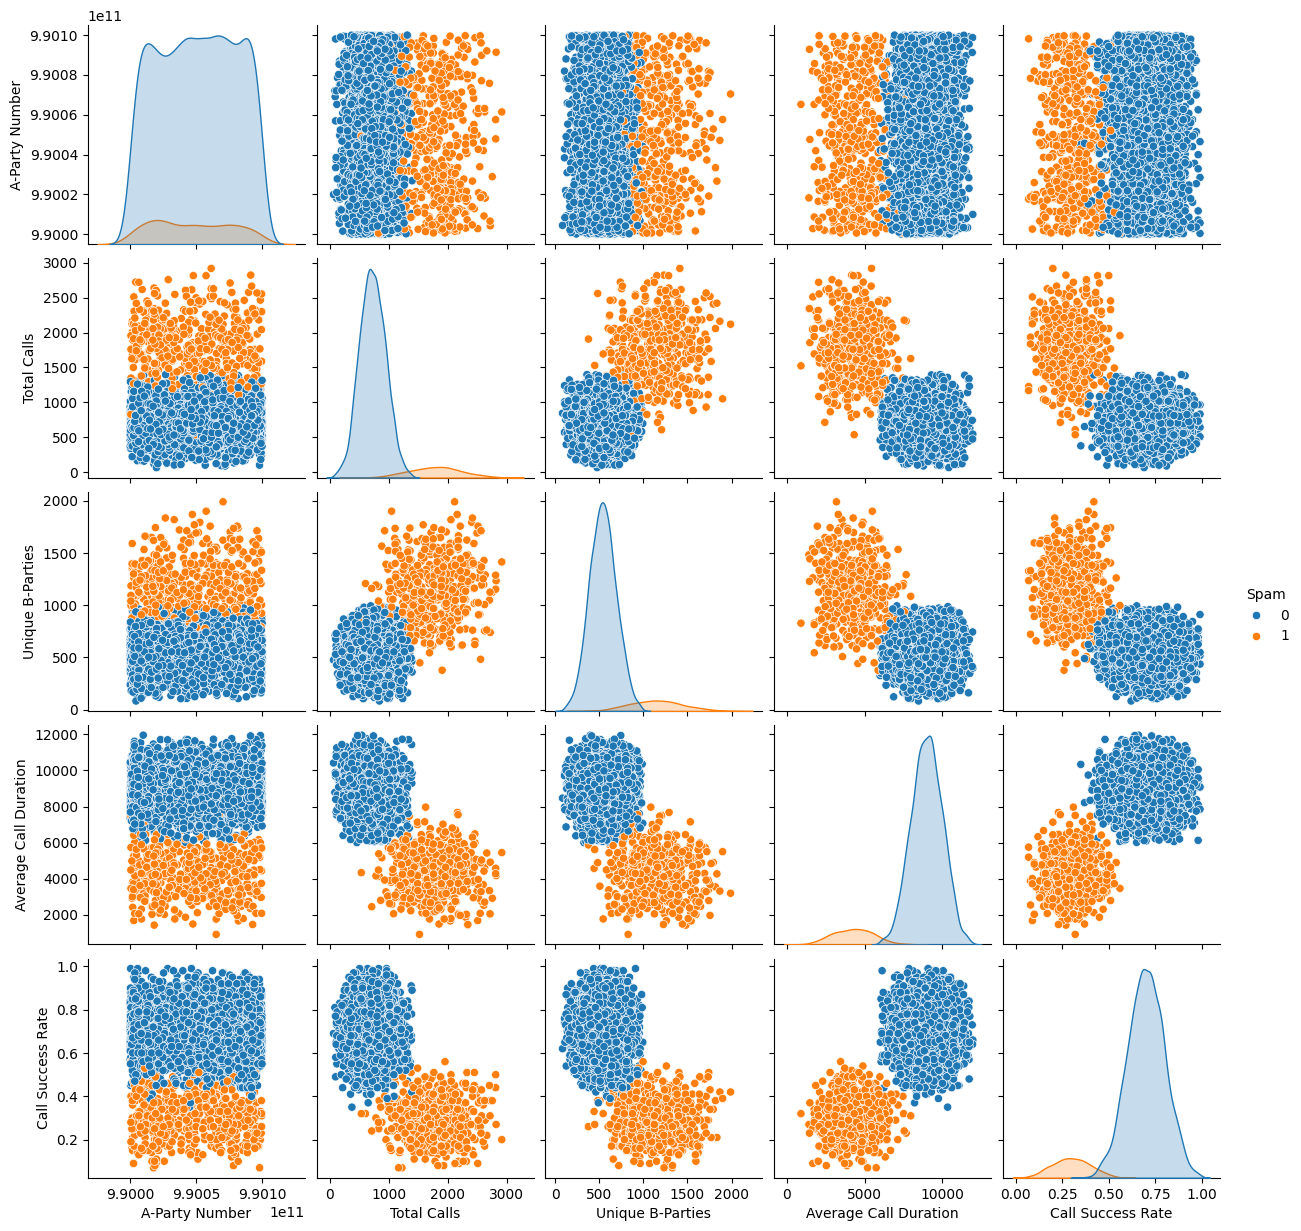

In [41]:
# --- Data Exploration ---
import seaborn as sns
import matplotlib.pyplot as plt

#Correlation Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Scatter plots for feature pair
sns.pairplot(df,hue = 'Spam')
plt.suptitle
plt.show()

**3. Feature Scaling**

In [42]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['A-Party Number', 'Spam'], axis=1)
y = df['Spam']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
print("\n Observe the scaled data:")
print(df_scaled)


 Observe the scaled data:
[[-0.38499903 -0.42914359 -0.24574657 -0.35344409]
 [-0.13265902 -0.40438799  0.11213049  0.89913864]
 [ 2.88522563  0.96542193 -4.00905666 -2.13343007]
 ...
 [-0.73929461  0.25163543 -0.47686321  1.22876568]
 [ 0.06615433 -0.16920978  0.83495959 -0.22159327]
 [ 0.188501   -0.60655873 -0.41967363 -0.68307112]]


**4. Split Dataset**

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp = train_test_split(df_scaled,y,test_size=0.2,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Testing set size: {len(X_test)}")
print("\nDistribution of spam labels in each set:")
print(f"Train: {y_train.value_counts(normalize=True)}")
print(f"Validation: {y_val.value_counts(normalize=True)}")
print(f"Test: {y_test.value_counts(normalize=True)}")


Training set size: 8000
Validation set size: 1000
Testing set size: 1000

Distribution of spam labels in each set:
Train: Spam
0    0.863625
1    0.136375
Name: proportion, dtype: float64
Validation: Spam
0    0.862
1    0.138
Name: proportion, dtype: float64
Test: Spam
0    0.869
1    0.131
Name: proportion, dtype: float64


**5. Model Training**

In [33]:
# --- Model Selection and Training ---
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier


# Initialize different models
logistic_regression_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
lgbm_model = LGBMClassifier(random_state=42)
neural_network_model = MLPClassifier(random_state=42, max_iter=600, early_stopping=True) # Change max_iter to experiment

# Train model one by one by changing model value manually
model = decision_tree_model #Change the models to experiment
trained_model = model.fit(X_train, y_train)


**6.Validation**

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_evaluate, y_evaluate):
    """Evaluates the trained model on the test data and returns a dictionary of metrics."""
    print(f"\nEvaluating {model.__class__.__name__} on the test set...")
    y_pred = model.predict(X_evaluate)
    metrics = {
        'accuracy': accuracy_score(y_evaluate, y_pred),
        'precision': precision_score(y_evaluate, y_pred),
        'recall': recall_score(y_evaluate, y_pred),
        'f1': f1_score(y_evaluate, y_pred)
    }
    print(f"Evaluation metrics: {metrics}")
    return metrics

val_metrics = evaluate_model(trained_model, X_val, y_val)
print(f"\n--- Evaluation Results for {model.__class__.__name__} ---")
for metric, value in val_metrics.items():
    print(f"  {metric}: {value:.4f}")


Evaluating DecisionTreeClassifier on the test set...
Evaluation metrics: {'accuracy': 0.912, 'precision': 0.6893939393939394, 'recall': 0.6594202898550725, 'f1': 0.674074074074074}

--- Evaluation Results for DecisionTreeClassifier ---
  accuracy: 0.9120
  precision: 0.6894
  recall: 0.6594
  f1: 0.6741


**7. Testing**

In [35]:
test_metrics = evaluate_model(trained_model, X_test, y_test)
print(f"\n--- Evaluation Results for {model.__class__.__name__} ---")
for metric, value in test_metrics.items():
    print(f"  {metric}: {value:.4f}")


Evaluating DecisionTreeClassifier on the test set...
Evaluation metrics: {'accuracy': 0.908, 'precision': 0.6326530612244898, 'recall': 0.7099236641221374, 'f1': 0.6690647482014388}

--- Evaluation Results for DecisionTreeClassifier ---
  accuracy: 0.9080
  precision: 0.6327
  recall: 0.7099
  f1: 0.6691


**End of the POC.**